<a href="https://colab.research.google.com/github/odheL42/NSU-senior-project/blob/main/data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Подготовка и скачивание с github файлов

In [ ]:
!ssh-keygen -t rsa -b 4096 -f ~/.ssh/id_rsa -N ''

Generating public/private rsa key pair.
Created directory '/root/.ssh'.
Your identification has been saved in /root/.ssh/id_rsa
Your public key has been saved in /root/.ssh/id_rsa.pub
The key fingerprint is:
SHA256:zNyAvReIeZtRF1YycA7AzPrAymU8fqYILMfjlsaabds root@b224ede1816d
The key's randomart image is:
+---[RSA 4096]----+
|       +..+.Bo.  |
|       =+o * o   |
|     o+.* . .    |
|      O= B .     |
| o . = +S o      |
|. * o . +.       |
| = + . +         |
| oB.. .          |
|o=o.E            |
+----[SHA256]-----+


In [ ]:
!ssh-keyscan -t rsa github.com >> ~/.ssh/known_hosts

# github.com:22 SSH-2.0-babeld-fdcea1d49


In [ ]:
!cat ~/.ssh/id_rsa.pub

ssh-rsa AAAAB3NzaC1yc2EAAAADAQABAAACAQCgsldLO9bYvJkTHHTKlVU/3ZOejSRZOGxte/Pa2kciAidJgvShyWG9rWN7h49sLpEb5irtfXsgWOT6lOr3VrgmZ16X5XTaF3/ciPIMQaO6tkSwb0oA2BNvr6PV6TcE/yaybNnkzmWSJpYffGSAS7/S6qicHFHd4BYvEDHX7okkCG4+uAKRbGLC12sK/ABrZz0KQ43jdjA70hwmNjWFDArd2K4to98uXkUhCcmYaglUph/bOph77N9o8uxel5FiUIv4N7wfW+G+Kj0z6ot50Ww4VHlhzMnZhxqnEkOgwKMh7SJzGFCDSqhkW1rU4o85EV7UGZW5bhb2nF88CPI4sg+KaKY8SkrMfeHHSn0mFpmDY1rcaBp3OSxE5/+wBPVbzxfCUyj6xLnXKRvdBPNOeZmAg3IgHtQAp6Stx3lYIRngXeldZLVSn8AqyCteV6Y0gxBZbxYLq6jTt+S3aAC5NJuXQPQEEqnu/xXD0gE/3aoHK2e+JO0wGivGwSQYvcHoYMQf71be4OgtFKQ/5WTvoZmitEXkANyZhMguB7AF/ZPrO9zov1IejRXkeNlE+vz8mO5x/JX2dFSvt70+FBp2kAl+zYA/Oc2HjWXSpdT6J13fz9lI+3naFBlp3ifCLP07GqnLnGMNoyaQAf4lb6lvJY4KuvvuUMhPlG+w6bZ9HhpNDQ== root@b224ede1816d


In [ ]:
!ssh -T git@github.com

Hi odheL42! You've successfully authenticated, but GitHub does not provide shell access.


In [ ]:
!git clone git@github.com:odheL42/NSU-senior-project.git frames

Cloning into 'frames'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 17 (delta 4), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (17/17), 8.37 KiB | 8.37 MiB/s, done.
Resolving deltas: 100% (4/4), done.


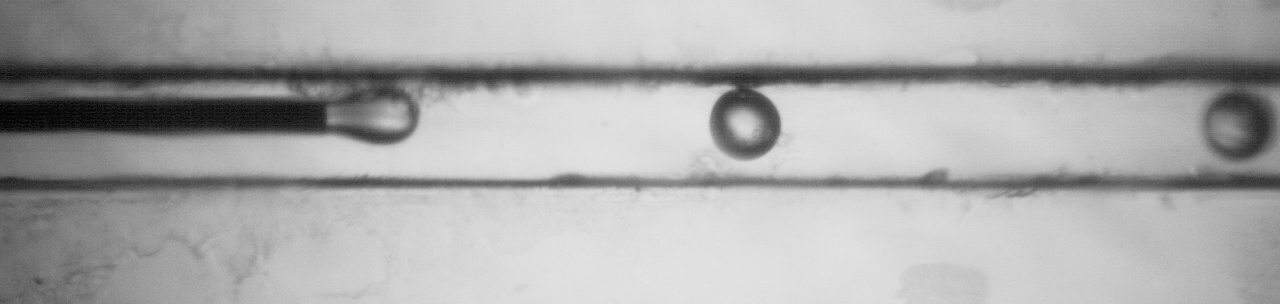

In [3]:
from PIL import Image
Image.open('/content/drive/MyDrive/dataset_nsu_senProj/result/sample_video_img_0022.jpg')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Получение кадров из видео, сохранение их на github

https://note.nkmk.me/en/python-opencv-video-to-still-image/

In [31]:
import cv2
import os

def save_all_frames(video_path, dir_path, basename, ext='jpg'):
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        return

    os.makedirs(dir_path, exist_ok=True)
    base_path = os.path.join(dir_path, basename)

    digit = len(str(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))))

    n = 0

    while True:
        ret, frame = cap.read()

        if ret:
            frame_cut = frame[:, 325:]
            cv2.imwrite('{}_{}.{}'.format(base_path, str(n).zfill(digit), ext), frame_cut)
            n += 1
        else:
            return

save_all_frames('/content/drive/MyDrive/dataset_nsu_senProj/oil_0p05ml_water_0ml.avi', '/content/drive/MyDrive/dataset_nsu_senProj/result_cutted', 'sample_video_img')

#save_all_frames('/content/drive/MyDrive/dataset_nsu_senProj/oil_0p05ml_water_0ml.avi', '/content/drive/MyDrive/dataset_nsu_senProj/result_cutted', 'sample_video_img', 'png')


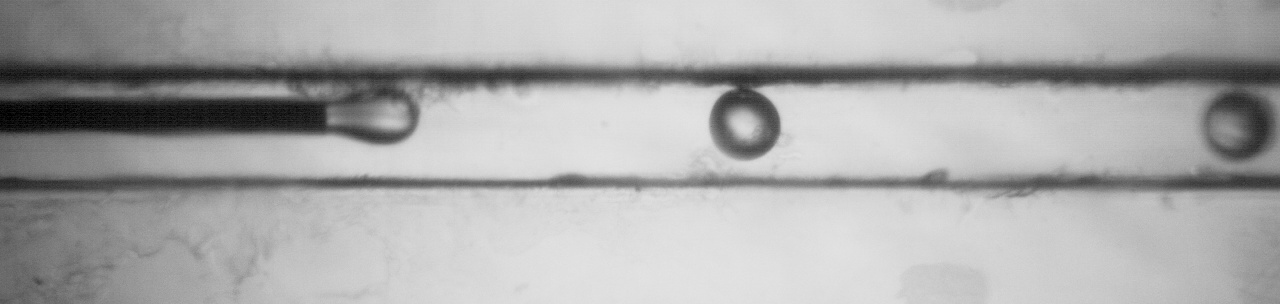

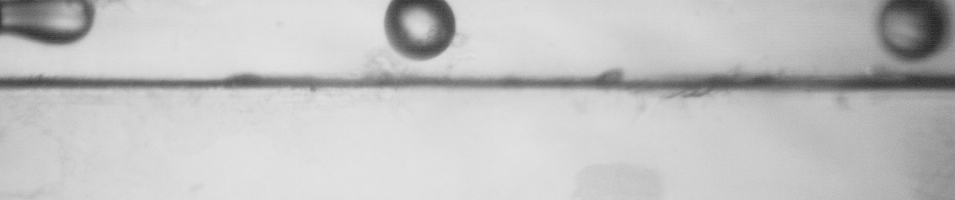

In [24]:
from google.colab.patches import cv2_imshow
frame_to_cut = '/content/drive/MyDrive/dataset_nsu_senProj/result/sample_video_img_0000.jpg'
res = cv2.imread(frame_to_cut)
res1 = res[:, 325:]
#Image.open(frame_to_cut)
print('\n')
cv2_imshow(res)
cv2_imshow(res1)

#Детектирование капель, определение их контура